In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 1AEB-AF08

 Directory of C:\Users\PoreSimPC\Downloads\Krzikalla-2012-master\images\berea

10/30/2019  01:53 PM    <DIR>          .
10/30/2019  01:53 PM    <DIR>          ..
10/30/2019  12:25 PM    <DIR>          .ipynb_checkpoints
10/24/2019  08:13 PM    <DIR>          CropTif
10/30/2019  01:53 PM            50,493 ImagePlot.ipynb
10/30/2019  12:13 PM       296,741,091 LargeGrain.npy
10/30/2019  12:13 PM       593,482,054 LargePore.npy
10/30/2019  12:13 PM       296,741,091 MicroPore.npy
10/30/2019  12:47 PM           106,761 MicroPorositySeg.ORSObject
10/23/2019  04:51 PM    <DIR>          SegFiles
09/18/2012  04:02 PM        61,132,732 segmented-kongju.mat
10/23/2019  01:09 PM    <DIR>          segmented-kongju.raw
09/18/2012  04:02 PM        42,743,165 segmented-kongju.raw.gz
10/23/2019  01:45 PM    <DIR>          segmented-stanford.raw
09/18/2012  04:02 PM        25,393,873 segmented-stanford.raw.gz
10/23/2019  01:45 PM    <

In [ ]:
#DragonFly script
ss=orsObj('95314509148551884CxvChannel')
data=ss.getNDArray()
np.save("C:\\Users\\PoreSimPC\\Downloads\\Krzikalla-2012-master\images\\berea"

In [109]:
LG=np.load('LargeGrain.npy')
MP=np.load('LargePore.npy')
LP=np.load('MicroPore.npy')

G=np.load("Grain.npy")

Combine=np.zeros_like(LG)

In [112]:
Combine[LG>0]=0
Combine[MP>0]=125
Combine[LP>0]=255

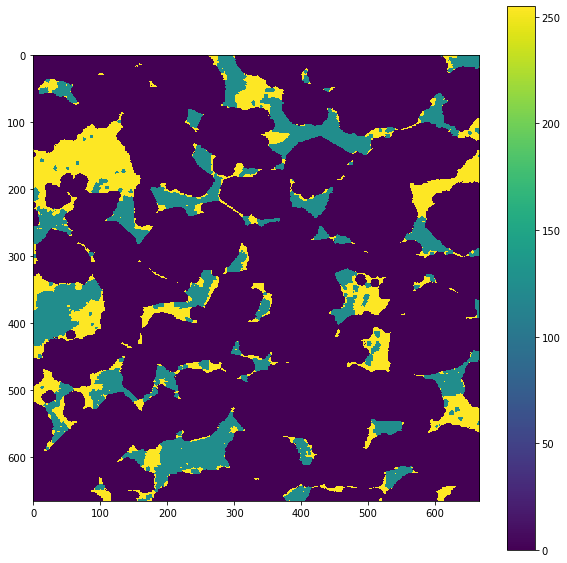

In [113]:
plt.rcParams['figure.figsize'] = [10, 10]
#plt.imshow(Combine[0:100,0:100,0])
plt.imshow(Combine[:,:,0])
plt.colorbar()
plt.show()

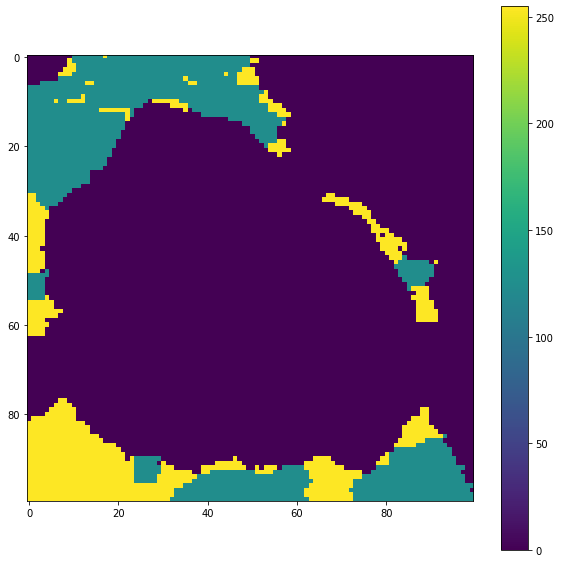

In [114]:
#Dragonfly Crop [1:100,1:100,250:350]
Subset=Combine[250:350,0:100,0:100] # Y,X,Z in YZ view (rightbottom figure)

#YZ plane in DragonFly
plt.rcParams['figure.figsize'] = [10, 10]
#plt.imshow(Subset[250:350,0:100,0]) #Y,X,Z YZ plane in Dragonfly
plt.imshow(Subset[:,:,0])
plt.colorbar()
plt.show()

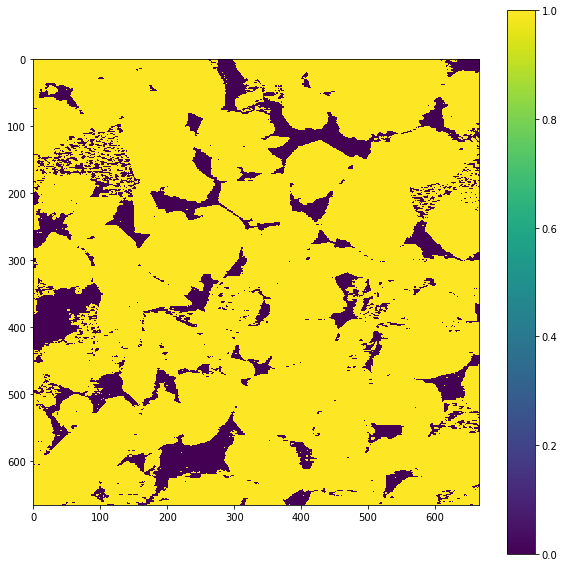

In [115]:
plt.rcParams['figure.figsize'] = [10, 10]
#plt.imshow(Combine[0:100,0:100,0])
plt.imshow(G[:,:,0])
plt.colorbar()
plt.show()

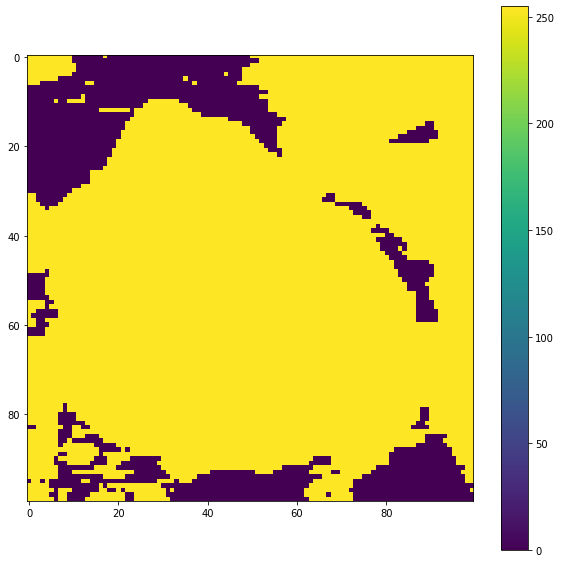

In [124]:
#Dragonfly Crop [1:100,1:100,250:350]
Subset=G[250:350,0:100,0:100] # Y,X,Z in YZ view (rightbottom figure)
Subset[Subset>0]=255

#YZ plane in DragonFly
plt.rcParams['figure.figsize'] = [10, 10]
#plt.imshow(Subset[250:350,0:100,0]) #Y,X,Z YZ plane in Dragonfly
plt.imshow(Subset[:,:,0])
plt.colorbar()
plt.show()

In [125]:
DX,DY,DZ=Subset.shape

In [126]:
Subset[0].T

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [127]:
with open('OrigBerea100_100_100.txt','w') as f:
    for layer in Subset.T:
        for col in layer.T:
            for row in col:
                f.write("%d " % row)
            f.write("\n")
        f.write("\n")

In [123]:
from PIL import Image
for i in range(DZ):
    im = Image.fromarray(np.uint8(cm.gist_earth(Subset[:,:,i])*255))
    im.save('.\Berea100_100_100\img'+str(i)+'.tif')